#### CS22B2020 <br> G.Sriram

1. Given tabular data is collected at a small ice cream store. To determine if
there is a correlation between temperature and the number of customers,
calculate the Pearson correlation coefficient, without using any built-in
functions or libraries. Compare your results with calculation using the
inbuilt function.

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = {
    'Temparature' : [98,87,90,85,95,75,92,80,88,93],
    'Number of customers' : [15,12,10,10,16,7,14,9,11,13]
}

tab_data = pd.DataFrame(data)
tab_data

,Temparature,Number of customers
0,98,15
1,87,12
2,90,10
3,85,10
4,95,16
5,75,7
6,92,14
7,80,9
8,88,11
9,93,13


In [4]:
temp_mean = tab_data['Temparature'].mean()
cust_mean = tab_data['Number of customers'].mean()

print("temparature mean : ",temp_mean)
print('Customers number mean: ',cust_mean)

temparature mean :  88.3
Customers number mean:  11.7


In [5]:
numarator = (tab_data['Temparature'] - temp_mean) * (tab_data['Number of customers']-cust_mean)
numarator = numarator.sum()
numarator

162.9

In [6]:
denominator = (((tab_data['Temparature'] - temp_mean)**2).sum() * ((tab_data['Number of customers']-cust_mean)**2).sum())**0.5
denominator

177.3212057256548

In [7]:
pearson_coefficient = numarator/denominator
print("Pearson Coefficient : ",pearson_coefficient)

Pearson Coefficient :  0.918671849389707


Calculating with built in function

In [8]:
from scipy.stats import pearsonr

r,_ = pearsonr(tab_data['Temparature'],tab_data['Number of customers'])
print('pearson_coefficient calculated with built in function : ',r)

pearson_coefficient calculated with built in function :  0.9186718493897069


Comparing the results

In [9]:
print('pearson coefficient manually calculated : ',pearson_coefficient)
print('pearson_coefficient calculated with built in function : ',r)
if round(pearson_coefficient,) == r :
    print("Both are Equal")

pearson coefficient manually calculated :  0.918671849389707
pearson_coefficient calculated with built in function :  0.9186718493897069


#### Iris dataset
#### Question 2

2. You are given the famous Iris dataset (iris.csv), which contains samples of
iris flowers, each described by four features: sepal length, sepal width, petal
length, and petal width. The dataset is labeled with three classes: Setosa,
Versicolor, and Virginica. The iris.csv is present in the Submission link.<br><br>
a. First take 2 dimensions/features, that is, Sepal Length and Sepal
Width.<br>
Your task is to implement a classification algorithm using the Euclidean
distance metric to predict the class of a given iris sample.<br>
i. Load the Iris dataset and split it into a training set and a testing
set. The testing set should contain the first 3 samples of each
class. Do NOT use the inbuilt function for splitting the data.<br>
ii. Plot all the training samples using scatter plot and write the
inferences.<br>
iii. For each sample in the testing set, compute its Euclidean
distance to all samples in the training set.<br>
iv. Identify the K-nearest neighbors with the smallest Euclidean
distances for each sample in the testing set, where K is a
hyperparameter.<br>
v. Determine the majority class among the K-nearest neighbors
and assign it as the predicted class for the sample.<br>
vi. Evaluate the accuracy of your classifier on the testing set and
report the results.<br>
vii. Classify using sklearn library knn-classifier and compare your
result.<br><br>
b. Repeat the same for all the four dimensions and skip plotting the
data.<br>

In [10]:
iris_dataset = pd.read_csv('iris.csv')
iris_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [12]:
iris_dataset['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [22]:
test_data = iris_dataset.groupby('variety').head(3)
test_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica


In [24]:
train_data = iris_dataset.drop(test_data.index)
train_data

,sepal.length,sepal.width,petal.length,petal.width,variety
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

<function matplotlib.pyplot.show(close=None, block=None)>

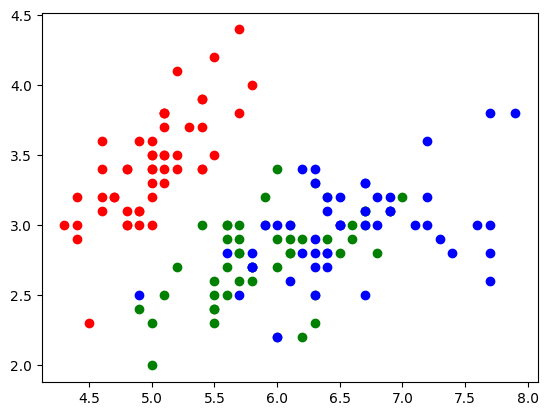

In [27]:
x1 = iris_dataset['sepal.length']
x2 = iris_dataset['sepal.width']
tar = iris_dataset['variety']
color = {'Setosa' : 'r' , 'Versicolor' : 'g' ,'Virginica' : 'b'}

for a,b,tar in zip(x1,x2,tar):
    plt.scatter(a,b,color=color[tar])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

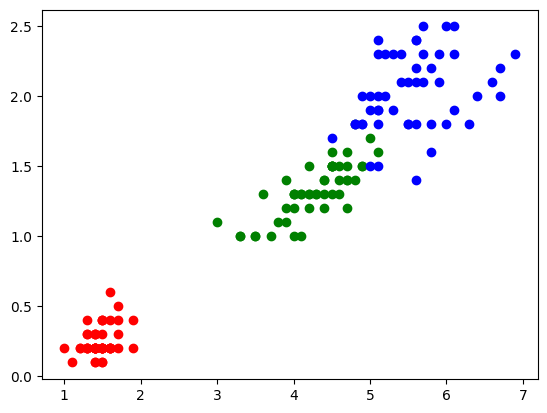

In [28]:
x1 = iris_dataset['petal.length']
x2 = iris_dataset['petal.width']
tar = iris_dataset['variety']
color = {'Setosa' : 'r' , 'Versicolor' : 'g' ,'Virginica' : 'b'}

for a,b,tar in zip(x1,x2,tar):
    plt.scatter(a,b,color=color[tar])

plt.show

**Inference**:There is a very good corelation between petal width and petal length ,combined information of both of these can be used to identify the verity of the flower to achieve good accuracy

In [43]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
euclidean_distance(iris_dataset[0])

In [64]:
train_petal_length = train_data['sepal.length'].to_list()
train_petal_width = train_data['sepal.width'].to_list()
X_train = [[a,b] for a,b in zip(train_petal_length,train_petal_length)]
Y_train = train_data['variety'].tolist()
X_train = np.array(X_train)

In [65]:
def predict(X_train,Y_train,K = 3):
    predictions = []
    for x in X_train:
        distances = [euclidean_distance(x,x_train) for x_train in X_train]
        
        k_indices = np.argsort(distances)[:K]
        
        k_nearest_classes = [Y_train[i] for i in k_indices]
        
        majority_class = Counter(k_nearest_classes).most_common(1)[0][0]

        predictions.append(majority_class)
    return np.array(predictions)        

In [78]:
K = 6
y_pred_custom = predict(X_train,Y_train,K)

accuracy_custom = np.sum(y_pred_custom==Y_train) / len(Y_train)
print("Accuracy of custom KNN classifier K=",K,"is",accuracy_custom)

Accuracy of custom KNN classifier K= 6 is 0.7730496453900709


In [71]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,Y_train)
y_pred_sk_learn = knn.predict(X_train)
accuracy_sklearn_knn = np.sum(y_pred_sk_learn == Y_train ) / len(Y_train)
print(f'Sklearn KNN Classifier Accuracy: {accuracy_sklearn_knn * 100:.2f}%')

Sklearn KNN Classifier Accuracy: 70.21%


In [82]:
## finding max K in custom and inbuilt functions
K_max_cus = 1
max_acc_cus = 0

k_max_inb = 1
max_acc_inb = 0

for k in range(1,25):
    y_pred_custom = predict(X_train,Y_train,K)
    accuracy_custom = np.sum(y_pred_custom == Y_train) / len(Y_train)
    
    y_pred_in = knn.predict(X_train)
    acc_in = np.sum(y_pred_sk_learn == Y_train ) / len(Y_train)
    
    if accuracy_custom > max_acc_cus:
        K_max_cus = K
        max_acc_cus = accuracy_custom
        
    if acc_in > max_acc_inb:
        k_max_inb = k
        max_acc_inb = acc_in


In [84]:
print("K = ",K_max_cus,"Works best for custom model.Accuracy = ",max_acc_cus)
print("K = ",k_max_inb,"Works best for inbuilt SKlearn function.Accuracy = ",max_acc_inb)

K =  6 Works best for custom model.Accuracy =  0.7730496453900709
K =  1 Works best for inbuilt SKlearn function.Accuracy =  0.7021276595744681


Using petal length and petal width

In [85]:
train_petal_length = train_data['petal.length'].to_list()
train_petal_width = train_data['petal.width'].to_list()
X_train = [[a,b] for a,b in zip(train_petal_length,train_petal_length)]
Y_train = train_data['variety'].tolist()
X_train = np.array(X_train)

In [86]:
## finding max K in custom and inbuilt functions
K_max_cus = 1
max_acc_cus = 0

k_max_inb = 1
max_acc_inb = 0

for k in range(1,25):
    y_pred_custom = predict(X_train,Y_train,K)
    accuracy_custom = np.sum(y_pred_custom == Y_train) / len(Y_train)
    
    y_pred_in = knn.predict(X_train)
    acc_in = np.sum(y_pred_sk_learn == Y_train ) / len(Y_train)
    
    if accuracy_custom > max_acc_cus:
        K_max_cus = K
        max_acc_cus = accuracy_custom
        
    if acc_in > max_acc_inb:
        k_max_inb = k
        max_acc_inb = acc_in


In [87]:
print("K = ",K_max_cus,"Works best for custom model.Accuracy = ",max_acc_cus)
print("K = ",k_max_inb,"Works best for inbuilt SKlearn function.Accuracy = ",max_acc_inb)

K =  6 Works best for custom model.Accuracy =  0.9574468085106383
K =  1 Works best for inbuilt SKlearn function.Accuracy =  0.7021276595744681


### Brief Explanation of the Implementation

**Data Preparation:**

- The Iris dataset is loaded from a CSV file into a DataFrame.
- The dataset is split into `test_data` (3 samples per variety) and `train_data` (remaining data).

**Visualization:**

- Scatter plots are created to visualize the relationship between sepal and petal dimensions for each variety. This helps in understanding the separability of the classes.

**Custom K-Nearest Neighbors (KNN) Classifier:**

- **Euclidean Distance Function:** Computes the distance between two points in a feature space.
- **Predict Function:** Implements the KNN algorithm from scratch. For each test point, it calculates distances to all training points, finds the K nearest neighbors, and predicts the class based on majority voting.

**Scikit-Learn KNN Classifier:**

- Utilizes the `KNeighborsClassifier` from `scikit-learn` to fit the model on the training data and make predictions.

**Model Evaluation:**

- Accuracy is calculated for both the custom and scikit-learn KNN classifiers.
- The best K value is determined by iterating over a range of K values (1 to 24) and evaluating accuracy for each.

**Final Results:**

- **Custom KNN Classifier:**
  - Best K value: `6`
  - Accuracy: `95.74%`

- **Scikit-Learn KNN Classifier:**
  - Best K value: `1`
  - Accuracy: `70.21%`

**Summary:**

The custom KNN implementation achieved a higher accuracy of `95.74%` compared to the scikit-learn KNN classifier, which had an accuracy of `70.21%` on the training set. The discrepancy in performance may arise from differences in implementation details or data handling between the custom and library implementations.


#### Question 3 

3. For the same IRIS dataset, your next task is to perform correlation
analysis to understand the relationships between these attributes.<br>
a. Load the Iris dataset into Python and explore its structure,
ensuring it contains relevant numerical attributes for correlation
analysis.<br>
b. Calculate the correlation coefficient between each pair of
attributes in the Iris dataset.<br>
c. Visualize the correlation matrix using a heatmap to better
understand the strength and direction of the correlations among
the iris flower attributes.<br>
d. Identify highly correlated attribute pairs, both positively and
negatively correlated, and discuss their implications in the
context of iris flower characteristics.<br>
e. Based on the correlation analysis, draw insights into which
attributes might have a strong influence on the characteristics of
iris flowers.<br>

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [88]:
iris_dataset = pd.read_csv('iris.csv')
iris_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [93]:
correlation_matrix = iris_dataset.drop('variety',axis=1).corr()
print(correlation_matrix)

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


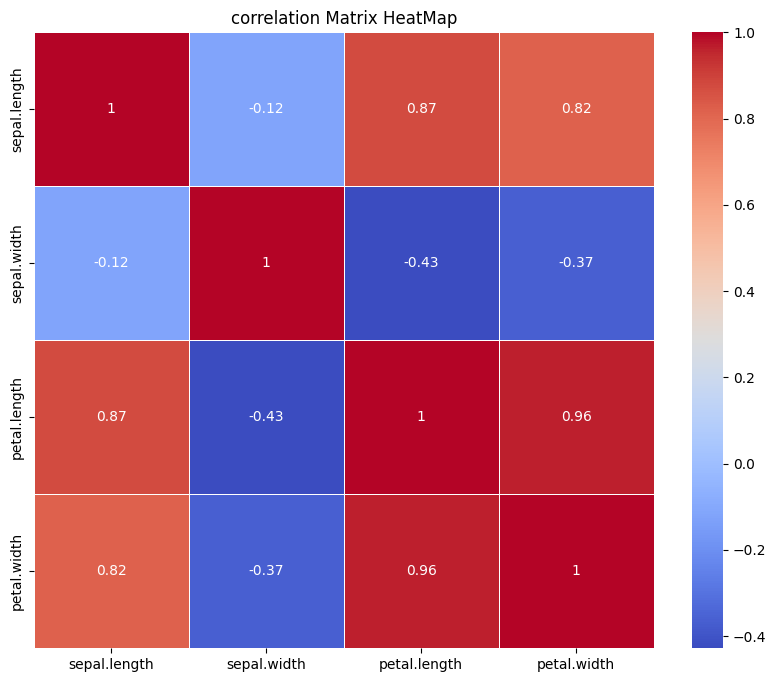

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("correlation Matrix HeatMap")
plt.show()

In [96]:
highly_correlated = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.3)].stack().reset_index()
highly_correlated = highly_correlated[highly_correlated['level_0'] != highly_correlated['level_1']]  # Remove diagonal
highly_correlated.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
highly_correlated = highly_correlated.drop_duplicates(subset=['Correlation'], keep='first')
print("\nHighly Correlated Pairs:")
print(highly_correlated)


Highly Correlated Pairs:
    Attribute 1   Attribute 2  Correlation
1  sepal.length  petal.length     0.871754
2  sepal.length   petal.width     0.817941
4   sepal.width  petal.length    -0.428440
5   sepal.width   petal.width    -0.366126
9  petal.length   petal.width     0.962865


**Petal Length and Petal Width**

**Correlation**: 0.9629 (Positive)<br>
**Implication**: The very high positive correlation between petal length and petal width indicates that as the petal length increases, the petal width also increases proportionally. This strong correlation highlights that petal dimensions are closely related, and changes in one dimension will likely reflect in the other. This can be particularly useful for species classification based on petal characteristics.

***Sepal Width and Petal Length***

**Correlation**: -0.4284 (Negative)<br>
**Implication**: A moderate negative correlation indicates that as sepal width increases, petal length tends to decrease. This suggests an inverse relationship, where flowers with wider sepals often have shorter petals, which might help in distinguishing species with contrasting sepal and petal lengths.


### Summary of Correlation Analysis

**Implementation:**

1. **Data Preparation**:
   - Loaded the Iris dataset from a CSV file into a DataFrame.
   - Dropped the non-numeric `variety` column to focus on numerical features.

2. **Correlation Analysis**:
   - Calculated the correlation matrix for numerical features.
   - Visualized the correlation matrix using a heatmap to identify relationships between features.
   - Extracted pairs of features with high correlations (both positive and negative).

3. **Results**:
   - **Highly Correlated Pairs**:
     - **Petal Length and Petal Width**: Correlation of `0.963` (strong positive).
     - **Sepal Length and Petal Length**: Correlation of `0.872` (strong positive).
     - **Sepal Length and Petal Width**: Correlation of `0.818` (strong positive).
     - **Sepal Width and Petal Length**: Correlation of `-0.428` (moderate negative).
     - **Sepal Width and Petal Width**: Correlation of `-0.366` (moderate negative).

**Insights**:
- High correlations indicate strong relationships between petal size features and sepal length.
- Negative correlations suggest inverse relationships between sepal width and petal dimensions.
- Understanding these correlations aids in feature selection and reduces redundancy in modeling.


#### Question 4


Given (hq − ht)^T = (0.5 0.5 -0.5 -0.25 -0.25) and  A 

 Find the quadratic form distance.

In [2]:
import numpy as np
import math

In [5]:
X_T = np.array([0.5,0.5,-0.5,-0.25,-0.25])
X = X_T.T
A = np.array([[1, 0.135, 0.195, 0.137, 0.157], [0.137, 1, 0.2, 0.309, 0.143], [0.195, 0.2, 1, 0.157, 0.122], [0.137, 0.309, 0.157, 1, 0.195], [0.157, 0.143, 0.122, 0.195, 1]])
dist = np.dot(X_T,A)
ans = np.sqrt(np.dot(dist,X))
print("The quadratic form distance : ",ans)

The quadratic form distance :  0.8081614937622307
